# Time Series Analysis and Forecasting of Tweeter Data

Continuous Assessment 2 10/11/2023 - BD & ADA Module // MSc in Data Analytics Y1 S2 - Student ID 2023063

Data: ProjectsTweets.csv

Github: https://github.com/ASM2023063/mscda-20232-ca2

# 1. Research Understanding Phase 


### Draft rewrite description later
- In this study an overarching analysis of Customer behavior in eCommerce shop was provided, preparing the customers’ event data for modeling and analysis to predict the number of purchases future customers will do.
- PySparkSQL and TensorFlow were used in Jupyter Notebook file to complete this task, using SQL and Python coding language.
- To perform an organized and clear understanding of the study timeline, Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology was used, and the cells of code were grouped according to the methodology’s phases.
- An Artificial Neural Network model was applied to the chosen variables X and y. For the evaluation phase Mean Absolute Error (MAE) and Mean Squared Error (MSE) were registered to measure the error between predicted and actual values.



# 2. Data Understanding Phase

Practical Big Data 


In [1]:
#Import PySparkSQL
import pyspark
from pyspark.sql import SparkSession        

# Create SparkSession with enableHiveSupport
df = (SparkSession
  .builder
  .master("local[*]")
  .appName("SparkSQL")
  .enableHiveSupport() 
  .getOrCreate())

# Path to dataset
csv_file = "file:////home/hduser/Downloads/2023063_CA2/ProjectTweets.csv"

In [2]:
# Read and create a temporary view
df = (spark.read.format("csv")
  .option("inferSchema", "true")
  .option("header", "false")
  .load(csv_file)
  .toDF("id","number","date","query","name","body"))
df.createOrReplaceTempView("temp_view")

In [3]:
# Visualise inferred schema
data = spark.sql("SELECT * FROM temp_view")
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- number: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- name: string (nullable = true)
 |-- body: string (nullable = true)



In [4]:
# Display 5 first rows
data.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
| id|    number|                date|   query|           name|                body|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [5]:
# Create database
spark.sql("CREATE DATABASE IF NOT EXISTS projectdb")

2023-10-28 12:52:06,784 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-10-28 12:52:06,784 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-10-28 12:52:07,878 WARN metastore.ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
2023-10-28 12:52:07,878 WARN metastore.ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore hduser@127.0.1.1
2023-10-28 12:52:07,997 WARN metastore.ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
2023-10-28 12:52:08,003 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Database projectdb already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_database(HiveMetaStore.java:925)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeM

DataFrame[]

In [6]:
# Create table in database
spark.sql("CREATE TABLE IF NOT EXISTS projectdb.tweetsTable (id Int, number long, date String, query String, name String, body String)")

2023-10-28 12:52:08,052 WARN analysis.ResolveSessionCatalog: A Hive serde table will be created as there is no table provider specified. You can set spark.sql.legacy.createHiveTableByDefault to false so that native data source table will be created instead.
2023-10-28 12:52:08,244 WARN session.SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2023-10-28 12:52:08,326 WARN conf.HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
2023-10-28 12:52:08,326 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-10-28 12:52:08,326 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-10-28 12:52:08,347 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Table tweetstable already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_table_core(HiveMetaStore.java:1416)
	at org.apac

DataFrame[]

In [7]:
# Alocate data to hive database
#spark.sql("INSERT INTO TABLE projectdb.tweetsTable SELECT * FROM temp_view")

In [8]:
# Display table content
spark.sql("SELECT * FROM projectdb.tweetsTable").show(10,truncate=False)

+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|id    |number    |date                        |query   |name           |body                                                                                                                                     |
+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|816210|1551363506|Sat Apr 18 08:51:40 PDT 2009|NO_QUERY|prosario_2000  |@ctribe I hope you are having a great day.                                                                                               |
|816211|1551363569|Sat Apr 18 08:51:39 PDT 2009|NO_QUERY|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual         

In [9]:
# Number of rows
spark.sql("SELECT count(*) as total FROM projectdb.tweetsTable").show()

+-------+
|  total|
+-------+
|1600000|
+-------+



In [10]:
# Number of unique rows
df2 = spark.sql("SELECT count(distinct *) FROM projectdb.tweetsTable")
df2.show()

+---------------------------------------------------+
|count(DISTINCT id, number, date, query, name, body)|
+---------------------------------------------------+
|                                            1600000|
+---------------------------------------------------+



# 3. Data Preparation Phase

In [11]:
# Import library
import pyspark.sql.functions
from pyspark.sql.functions import split, to_date, date_format

In [12]:
# Create variable 
tweet_data = spark.sql("SELECT * FROM projectdb.tweetsTable")

In [13]:
# Split column date into new columns
tweet_data = tweet_data.withColumn("date_parts", split(tweet_data["date"]," "))

tweet_data = tweet_data.withColumn("month", tweet_data["date_parts"][1])
tweet_data = tweet_data.withColumn("day", tweet_data["date_parts"][2])
tweet_data = tweet_data.withColumn("time", tweet_data["date_parts"][3])
tweet_data = tweet_data.withColumn("year", tweet_data["date_parts"][5])
tweet_data = tweet_data.withColumn("weekday", tweet_data["date_parts"][0])
tweet_data = tweet_data.withColumn("timezone", tweet_data["date_parts"][4])

In [14]:
# Split new column time into new columns
tweet_data = tweet_data.withColumn("time_format", split(tweet_data["time"],":"))

tweet_data = tweet_data.withColumn("hour", tweet_data["time_format"][0])
tweet_data = tweet_data.withColumn("minute", tweet_data["time_format"][1])
tweet_data = tweet_data.withColumn("second", tweet_data["time_format"][2])


In [15]:
# Drop columns
tweet_data = tweet_data.drop("date_parts")
tweet_data = tweet_data.drop("date")
tweet_data = tweet_data.drop("number")
tweet_data = tweet_data.drop("query")
tweet_data = tweet_data.drop("time_format")
tweet_data = tweet_data.drop("time")

In [16]:
# Check changes 
tweet_data.show()

+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|    id|           name|                body|month|day|year|weekday|timezone|hour|minute|second|
+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|816210|  prosario_2000|@ctribe I hope yo...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    40|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nop...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    39|
|816212|askbillmitchell|@marty0518 Someti...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816213|       kendiixd|so i guesss im no...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816214|    ladycalypso|@DaiLS I do that,...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    42|
|816215| FindingAnswers|trendy topic - Re...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816216|      HTwashere|@firsttiger Real ...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816217|     kelliekano|@Drago

In [17]:
# Sentiment analysis 

#!pip install vaderSentiment
#!pip install nltk

In [18]:
# Load library
import nltk

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import when

In [19]:
# Define function  and create sentiment_score column
def analyse_sentiment(body):
    analyser = SentimentIntensityAnalyzer()
    sentiment = analyser.polarity_scores(body)
    return sentiment['compound']

sentiment_udf = udf(analyse_sentiment, DoubleType())

tweet_data = tweet_data.withColumn("sentiment_score", sentiment_udf(tweet_data['body']))

In [20]:
tweet_data.write.mode("overwrite").saveAsTable("tweet_data2")

In [21]:
# New column polarity based on compound value
tweet_data = tweet_data.withColumn("polarity", when (tweet_data["sentiment_score"]>= 0.05, "positive")
                                                .when(tweet_data["sentiment_score"]<=-0.05, "negative")
                                                .otherwise("neutral")
                                                )

In [22]:
# Display data
tweet_data.show(5, truncate=False)

+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|id    |name           |body                                                                                                    |month|day|year|weekday|timezone|hour|minute|second|sentiment_score|polarity|
+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|816210|prosario_2000  |@ctribe I hope you are having a great day.                                                              |Apr  |18 |2009|Sat    |PDT     |08  |51    |40    |0.7906         |positive|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual                                  |Apr  |18 |2009|Sat    |PDT     |08  |51    |39 

In [23]:
# Data preparation to make visualisations

tweet_pandas = tweet_data.toPandas()

In [24]:
# Import library
import pandas as pd

In [25]:
# Function to convert month to number
def convert_to_number(abbrev):
    month_abbrev_to_number= {
        'Jan':'01', 
        'Fev':'02', 
        'Mar':'03', 
        'Apr':'04', 
        'May':'05', 
        'Jun':'06', 
        'Jul':'07', 
        'Aug':'08', 
        'Sep':'09', 
        'Oct':'10', 
        'Nov':'11', 
        'Dec':'12'
    } 
    return month_abbrev_to_number.get(abbrev, abbrev)

tweet_pandas['month'] = tweet_pandas['month'].apply(convert_to_number)

In [26]:
# Convert data type from str to int
tweet_pandas['month'] = tweet_pandas['month'].astype(int)
tweet_pandas['day'] = tweet_pandas['day'].astype(int)
tweet_pandas['year'] = tweet_pandas['year'].astype(int)
tweet_pandas['hour'] = tweet_pandas['hour'].astype(int)
tweet_pandas['minute'] = tweet_pandas['minute'].astype(int)
tweet_pandas['second'] = tweet_pandas['second'].astype(int)

In [27]:
# Check changes
tweet_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1600000 non-null  int32  
 1   name             1600000 non-null  object 
 2   body             1600000 non-null  object 
 3   month            1600000 non-null  int64  
 4   day              1600000 non-null  int64  
 5   year             1600000 non-null  int64  
 6   weekday          1600000 non-null  object 
 7   timezone         1600000 non-null  object 
 8   hour             1600000 non-null  int64  
 9   minute           1600000 non-null  int64  
 10  second           1600000 non-null  int64  
 11  sentiment_score  1600000 non-null  float64
 12  polarity         1600000 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 152.6+ MB


In [28]:
# Create column date 
tweet_pandas['date']=pd.to_datetime(tweet_pandas[['year','month','day']], format='%Y-%m-%d')

In [29]:
tweet_pandas.head()

,id,name,body,month,day,year,weekday,timezone,hour,minute,second,sentiment_score,polarity,date
0,816210,prosario_2000,@ctribe I hope you are having a great day.,4,18,2009,Sat,PDT,8,51,40,0.7906,positive,2009-04-18
1,816211,Chelsea_Volturi,@Boy_Kill_Boy Nope Just Bored Well Say That Mo...,4,18,2009,Sat,PDT,8,51,39,0.0000,neutral,2009-04-18
2,816212,askbillmitchell,@marty0518 Sometimes? and just a little crypti...,4,18,2009,Sat,PDT,8,51,41,0.7787,positive,2009-04-18
3,816213,kendiixd,so i guesss im not in coolifornia anymore how ...,4,18,2009,Sat,PDT,8,51,41,0.0000,neutral,2009-04-18
4,816214,ladycalypso,"@DaiLS I do that, too, but right now, it's the...",4,18,2009,Sat,PDT,8,51,42,0.6310,positive,2009-04-18


In [30]:
# Group by day and calculate the average sentiment score 
daily_sentiment = tweet_pandas.groupby('date')['sentiment_score'].mean().reset_index()

In [31]:
daily_sentiment

,date,sentiment_score
0,2009-04-06,0.142341
1,2009-04-07,0.161992
2,2009-04-17,0.198497
3,2009-04-18,0.180743
4,2009-04-19,0.184278
5,2009-04-20,0.172956
6,2009-04-21,0.174545
7,2009-05-01,0.177180
8,2009-05-02,0.180311
9,2009-05-03,0.172791


In [32]:
# Create newdf 
# Since the original data contains a lot of missing values, newdf was created to visualise how many days are null.
newdf = {
    
    'date': pd.date_range(start='2009-04-06', end='2009-06-25', freq='D'),
    'sentiment_score': None
}

newdf_daily_merge = pd.DataFrame(newdf)
newdf_daily_merge.set_index('date',inplace=True)

In [33]:
newdf_daily_merge

,sentiment_score
date,
2009-04-06,None
2009-04-07,None
2009-04-08,None
2009-04-09,None
2009-04-10,None
...,...
2009-06-21,None
2009-06-22,None
2009-06-23,None


In [34]:
daily_sentiment.set_index('date',inplace=True)

In [35]:
# Merge newdf with daily_sentiment
newdf_daily_merge = newdf_daily_merge.combine_first(daily_sentiment)
 
pd.set_option('display.max_rows', None)
newdf_daily_merge

,sentiment_score
date,
2009-04-06,0.142341
2009-04-07,0.161992
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN
2009-04-11,NaN
2009-04-12,NaN
2009-04-13,NaN
2009-04-14,NaN


In [36]:
# New column weekday
#newdf_daily_merge['weekday']=newdf_daily_merge.index.day_name()
newdf_daily_merge

,sentiment_score
date,
2009-04-06,0.142341
2009-04-07,0.161992
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN
2009-04-11,NaN
2009-04-12,NaN
2009-04-13,NaN
2009-04-14,NaN


In [37]:
# Removing april from dataframe because there was only 7 days of data
newdf_daily_merge = newdf_daily_merge[~(newdf_daily_merge.index.month==4)]
newdf_daily_merge.head()

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN


In [38]:
# Define a function to input sentiment_score to NaN
# Start to input values where it is NaN.  
#
# 1st situation: when there is a single NaN, 
# it will be replaced with the mean value between the day before and the day after. 


def fill_nan_with_mean(df, date_to_fill, column_name):
    date_to_fill = pd.to_datetime(date_to_fill)
    
    if date_to_fill in df.index:
        mean_value = df.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill+pd.DateOffset(days=1),column_name].mean()
        
        df.at[date_to_fill, column_name] = mean_value
    return df

In [39]:
# Use function to input sentiment_score when there is only a single day with NaN

newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-12', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-15', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-24', 'sentiment_score')

newdf_daily_merge


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [40]:
# 2nd situation: when there are 2 missing values in a row
#
# Input missing values on date 2009-05-19 and 2009-05-20
# To fill day 19, the mean of days 17 and 18 was used

date_to_fill = pd.to_datetime('2009-05-19')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before
newdf_daily_merge

0.19453486811810616


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [41]:
# To fill day 20 (single day), the previous function from 1st situation (fill_nan_with_mean) was used. 
#
# Recap: the function calculates the mean of the days before and after.
# In this case, day 20 is the mean between day 19 and 21.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-20', 'sentiment_score')
newdf_daily_merge

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [42]:
# 3rd situation: 4 days in a row of missing values. 
# Date range: 05-05 to 05-08

# To input value to day 05 and 06, it was used the same code used for the 2nd situation.
# Day 05 is the mean of days 03 and 04.

date_to_fill = pd.to_datetime('2009-05-05')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before


date_to_fill = pd.to_datetime('2009-05-06')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

newdf_daily_merge.head(10)

0.1679227990513643
0.16548862644900753


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [43]:
# There are days 07 and 08, that are still empty. 
# 4th situation: 2 missing values, mean of the days after. 
# 
# Day 08 will be the mean of days 09 and 10. 
# To avoid doing means on input values

date_to_fill = pd.to_datetime('2009-05-08')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()

print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge.head(10)

0.19780787503569208


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,NaN
2009-05-08,0.197808
2009-05-09,0.182475


In [44]:
# Now there is a single NaN on day 05-07.
# 1st situtation again: using function fill_nan_with_mean

#Day 07 is the mean of days 06 and 08.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-07', 'sentiment_score')
newdf_daily_merge.head(10)

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [45]:
# There are still 6 empty values, from day 06-08 to 06-13

newdf_daily_merge

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [46]:
# Day 08: mean of days 06 and 07 (2nd situation)

date_to_fill = pd.to_datetime('2009-06-08')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 09: mean of days 07 and 08

date_to_fill = pd.to_datetime('2009-06-09')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 10: mean of days 08 and 09

date_to_fill = pd.to_datetime('2009-06-10')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Display values
newdf_daily_merge.tail(20)

0.18080606917425684
0.18116606676149272
0.18098606796787478


,sentiment_score
date,
2009-06-06,0.180086
2009-06-07,0.181526
2009-06-08,0.180806
2009-06-09,0.181166
2009-06-10,0.180986
2009-06-11,NaN
2009-06-12,NaN
2009-06-13,NaN
2009-06-14,0.171822


In [47]:
# Day 13: mean of days 14 and 15 (4th situation)

date_to_fill = pd.to_datetime('2009-06-13')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 12: mean of days 13 and 14 (4th situation)

date_to_fill = pd.to_datetime('2009-06-12')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 11: mean of days 12 and 13 (4th situation)

date_to_fill = pd.to_datetime('2009-06-11')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge

0.16853714336439507
0.1701797902508629
0.17323433386104425


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


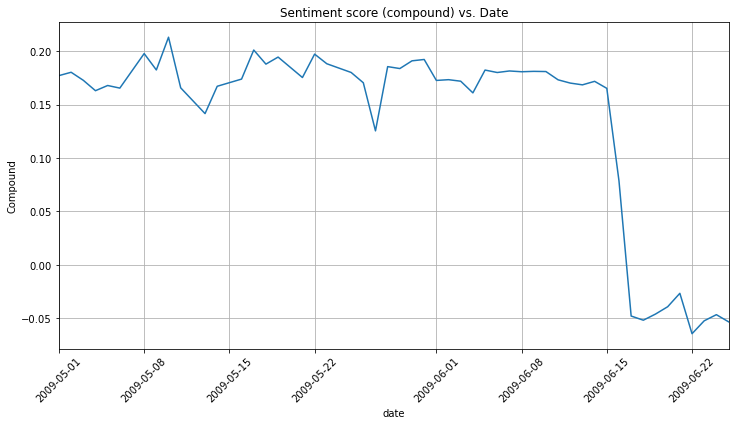

In [48]:
# Import library
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12,6));
ax.plot(newdf_daily_merge.index.to_numpy(), newdf_daily_merge['sentiment_score'].to_numpy());
ax.set_xlabel('date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.tick_params(axis='x',rotation=45);

ax.set_xlim(newdf_daily_merge.index.min(),newdf_daily_merge.index.max())
ax.set_title('Sentiment score (compound) vs. Date');

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
newdf_daily_merge.head()

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923


In [51]:
result = seasonal_decompose(newdf_daily_merge['sentiment_score'], model= 'additive')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

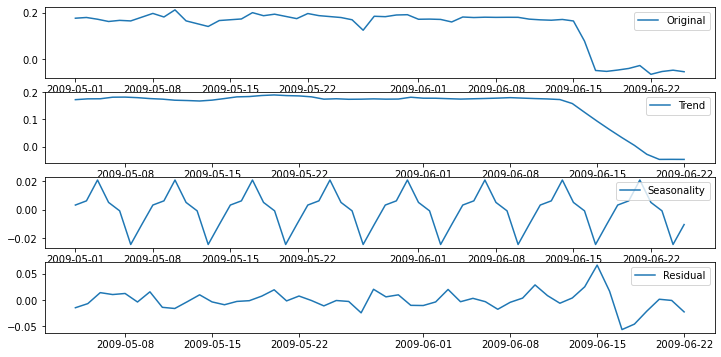

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(newdf_daily_merge['sentiment_score'], label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')


In [70]:
import panel as pn
from io import BytesIO
import param

# Define the function to plot a component
def plot_component(component):
    plt.figure(figsize=(12, 6))
    if component == 'Original':
        plt.plot(newdf_daily_merge['sentiment_score'], label='Original')
    elif component == 'Trend':
        plt.plot(trend, label='Trend')
    elif component == 'Seasonality':
        plt.plot(seasonal, label='Seasonality')
    elif component == 'Residual':
        plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.title(f'{component} Component')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    return plt.show()

components = ['Original', 'Trend', 'Seasonality', 'Residual']
    
component_select = pn.widgets.Select(name='Select component', options=components)

def plot_callback(component):
    img_buf = plot_component(newdf_daily_merge, component)
    return pn.pane.PNG(img_buf)

dashboard = pn.Column(component_select, plot_callback,sizing_mode='scale_width')


# Show the dashboard
dashboard.servable()

AttributeError: type object 'widget' has no attribute 'Select'

# 4. Modeling Phase

In [53]:
# Check for missing values
print(f' Rows with missing values: {newdf_daily_merge.isnull().any(axis=1).mean()}')

 Rows with missing values: 0.0


In [54]:
# Import library
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [55]:
newdf_daily_merge = newdf_daily_merge.asfreq('D')

Train dates: 2009-05-01 00:00:00 --- 2009-06-18 00:00:00 (n=49) 
Test dates: 2009-06-19 00:00:00 --- 2009-06-25 00:00:00 (n=7) 


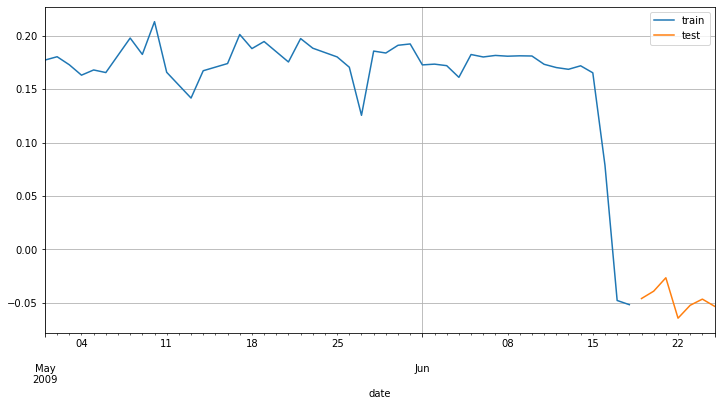

In [56]:
# Split data
steps = 7 #the last 7 days are used as the test set to evaluate the predictive capacity of the model
data_train = newdf_daily_merge[:-steps]
data_test = newdf_daily_merge[-steps:]

print(f'Train dates: {data_train.index.min()} --- {data_train.index.max()} (n={len(data_train)}) ')
print(f'Test dates: {data_test.index.min()} --- {data_test.index.max()} (n={len(data_test)}) ')

fig, ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot(ax=ax, label='train')
data_test['sentiment_score'].plot(ax=ax, label='test')
ax.grid()
ax.legend();

In [57]:
# forecaster autoreg

from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error

forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=42),lags=7)
forecaster.fit(y=data_train['sentiment_score'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-05-01 00:00:00'), Timestamp('2009-06-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-10-26 14:17:29 
Last fit date: 2023-10-26 14:17:29 
Skforecast version: 0.10.1 
Python version: 3

In [58]:
# Predictions
steps = 7
predictions = forecaster.predict(steps=steps)
predictions.head()

2009-06-19   -0.030368
2009-06-20   -0.030486
2009-06-21   -0.030564
2009-06-22   -0.030564
2009-06-23   -0.030564
Freq: D, Name: pred, dtype: float64

In [59]:
data_test['sentiment_score']

date
2009-06-19   -0.046075
2009-06-20   -0.039213
2009-06-21   -0.026631
2009-06-22   -0.064475
2009-06-23   -0.052387
2009-06-24    -0.04664
2009-06-25   -0.053316
Freq: D, Name: sentiment_score, dtype: object

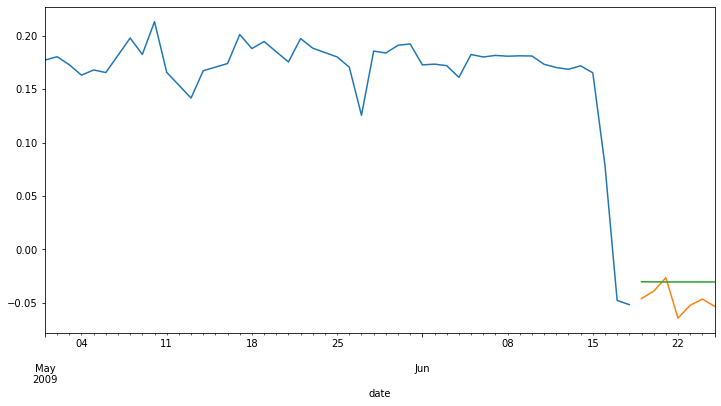

In [60]:
# Plot

fig.ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot( label='train')
data_test['sentiment_score'].plot( label='test')
predictions.plot(label='predictions')
ax.legend();


In [61]:
# Predictions
steps = 7
predictions = forecaster.predict(steps=steps)
predictions

2009-06-19   -0.030368
2009-06-20   -0.030486
2009-06-21   -0.030564
2009-06-22   -0.030564
2009-06-23   -0.030564
2009-06-24   -0.030564
2009-06-25   -0.030564
Freq: D, Name: pred, dtype: float64

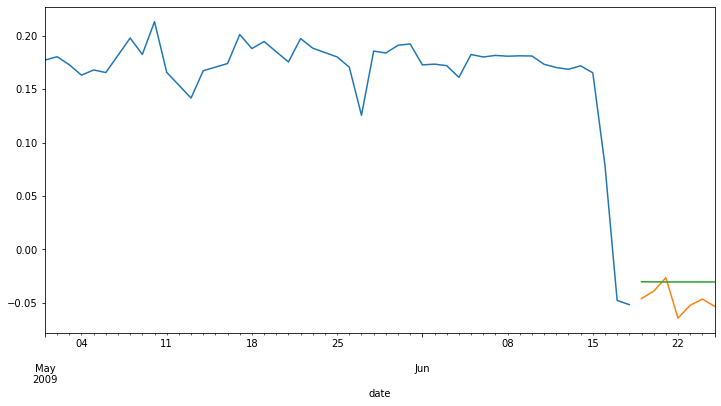

In [62]:
# Plot

fig.ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot( label='train')
data_test['sentiment_score'].plot( label='test')
predictions.plot(label='predictions')
ax.legend();

In [63]:
# ARIMA 

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

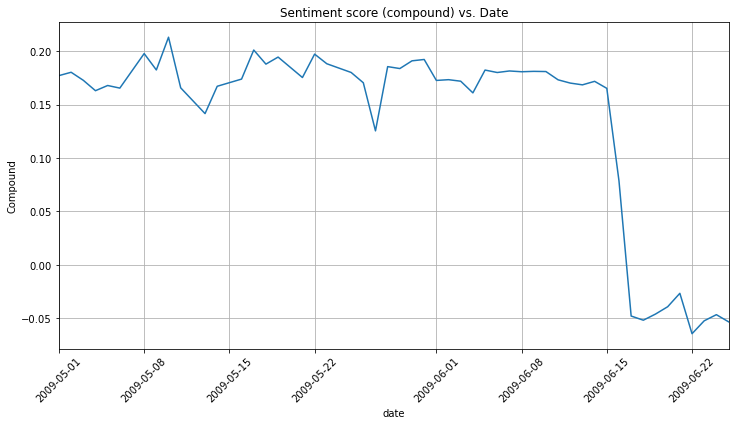

In [64]:
# Plot the original data
fig, ax = plt.subplots(figsize=(12,6));
ax.plot(newdf_daily_merge.index.to_numpy(), newdf_daily_merge['sentiment_score'].to_numpy());
ax.set_xlabel('date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.tick_params(axis='x',rotation=45);

ax.set_xlim(newdf_daily_merge.index.min(),newdf_daily_merge.index.max())
ax.set_title('Sentiment score (compound) vs. Date');

In [65]:
# Split train-test 
train = newdf_daily_merge[newdf_daily_merge.index < pd.to_datetime("2009-06-20", format='%Y-%m-%d')]
test = newdf_daily_merge[newdf_daily_merge.index >= pd.to_datetime("2009-06-20", format='%Y-%m-%d')]
test

,sentiment_score
date,
2009-06-20,-0.039213
2009-06-21,-0.026631
2009-06-22,-0.064475
2009-06-23,-0.052387
2009-06-24,-0.04664
2009-06-25,-0.053316


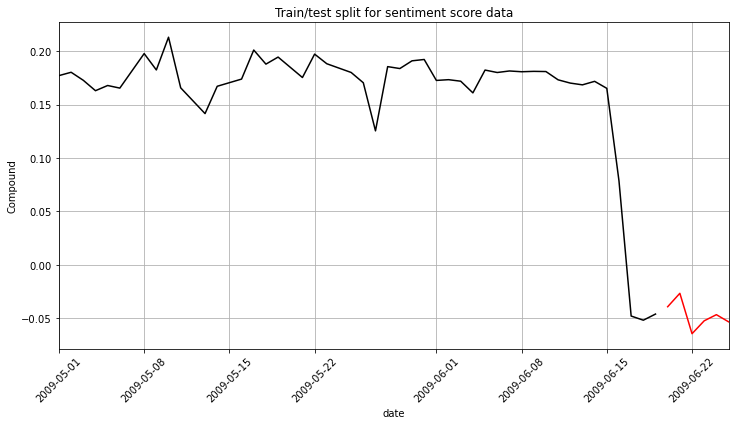

In [66]:
# Plot train-test data
fig, ax = plt.subplots(figsize=(12,6));
ax.plot(train, color='black', label='Training')
ax.plot(test, color='red', label='Testing')
ax.set_xlabel('date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.tick_params(axis='x',rotation=45);

ax.set_xlim(newdf_daily_merge.index.min(),newdf_daily_merge.index.max())
ax.set_title('Train/test split for sentiment score data');

In [94]:
# Autoregressive Moving Average (ARMA) Prediction 
y = train['sentiment_score']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

y_pred_df.index = test.index
y_pred_outARMA = y_pred_df['Predictions']

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16031D+00    |proj g|=  1.65468D+00

At iterate    5    f= -2.16084D+00    |proj g|=  1.49806D-02

At iterate   10    f= -2.16085D+00    |proj g|=  1.75705D-01

At iterate   15    f= -2.16086D+00    |proj g|=  5.73103D-03

At iterate   20    f= -2.16088D+00    |proj g|=  1.07704D-01

At iterate   25    f= -2.16132D+00    |proj g|=  4.91163D-01

At iterate   30    f= -2.16168D+00    |proj g|=  1.50177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

In [98]:
# Autoregressive Integrated Moving Average (ARIMA)
ARIMAmodel = SARIMAX(y, order=(5,4,2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['Predictions'] = ARIMAmodel.predict(start= y_pred_df.index[0], end= y_pred_df.index[-1])

y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df['Predictions']

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09747D+00    |proj g|=  2.15682D+01

At iterate    5    f= -1.24306D+00    |proj g|=  3.34805D-01

At iterate   10    f= -1.42256D+00    |proj g|=  4.13561D+00

At iterate   15    f= -1.45056D+00    |proj g|=  1.63707D+00

At iterate   20    f= -1.51672D+00    |proj g|=  1.35372D+00

At iterate   25    f= -1.53831D+00    |proj g|=  9.92615D-01

At iterate   30    f= -1.56748D+00    |proj g|=  4.65683D+00

At iterate   35    f= -1.63566D+00    |proj g|=  1.49796D+00

At iterate   40    f= -1.64015D+00    |proj g|=  2.38797D-01

At iterate   45    f= -1.64613D+00    |proj g|=  2.69782D-02

At iterate   50    f= -1.64829D+00    |proj g|=  8.32781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

In [107]:
train.set_index('date', inplace=True)

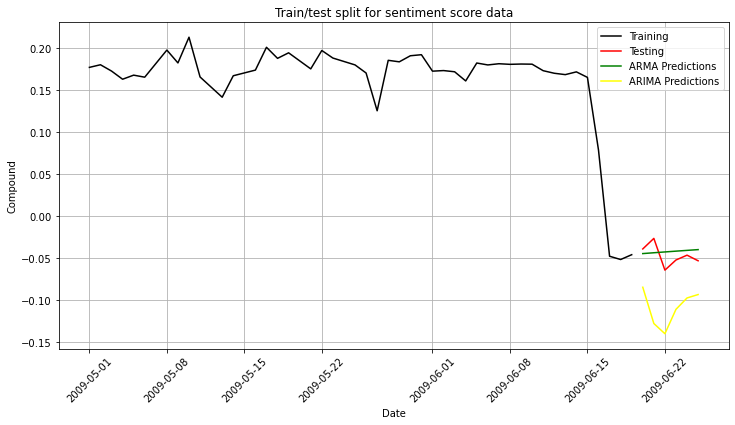

In [108]:
# Plot ARIMA
fig, ax = plt.subplots(figsize=(12,6));
ax.plot(train, color='black', label='Training')
ax.plot(test, color='red', label='Testing')
ax.plot(y_pred_outARMA, color='green', label='ARMA Predictions')
ax.plot(y_pred_outARIMA, color='yellow', label='ARIMA Predictions')
ax.set_xlabel('Date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.legend()
ax.tick_params(axis='x',rotation=45);
ax.set_title('Train/test split for sentiment score data');

In [90]:
# Seasonal Autoregressive Integrated Moving Average (SARIMA)
SARIMAXmodel = SARIMAX(y, order=(2,2,2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['Predictions'] = SARIMAXmodel.predict(start= y_pred_df.index[0], end= y_pred_df.index[-1])

y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df['Predictions']

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.02928D-01    |proj g|=  1.01937D+00

At iterate    5    f= -6.70231D-01    |proj g|=  2.51554D-01

At iterate   10    f= -6.83829D-01    |proj g|=  3.96835D-02

At iterate   15    f= -7.02592D-01    |proj g|=  3.20377D-02

At iterate   20    f= -7.05851D-01    |proj g|=  5.83828D-02

At iterate   25    f= -7.06257D-01    |proj g|=  1.83037D-02

At iterate   30    f= -7.06273D-01    |proj g|=  2.25946D-02

At iterate   35    f= -7.06683D-01    |proj g|=  1.86458D-01

At iterate   40    f= -7.06948D-01    |proj g|=  9.67399D-03

At iterate   45    f= -7.07059D-01    |proj g|=  1.36588D-01

At iterate   50    f= -7.08950D-01    |proj g|=  6.49484D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number

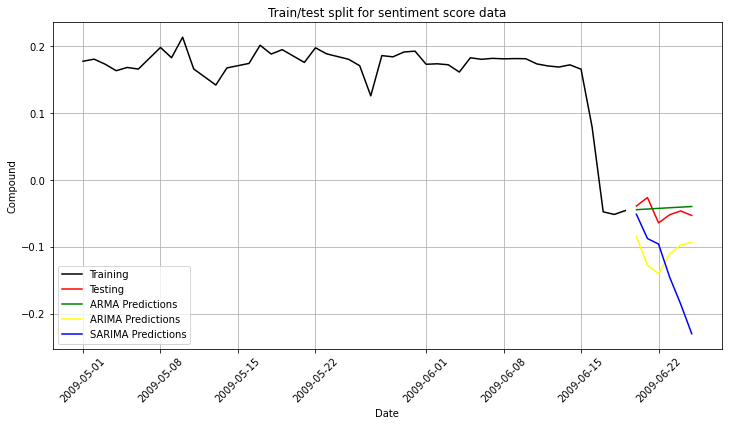

In [109]:
# Plot SARIMA
fig, ax = plt.subplots(figsize=(12,6));
ax.plot(train, color='black', label='Training')
ax.plot(test, color='red', label='Testing')
ax.plot(y_pred_outARMA, color='green', label='ARMA Predictions')
ax.plot(y_pred_outARIMA, color='yellow', label='ARIMA Predictions')
ax.plot(y_pred_outSARIMAX, color='blue', label='SARIMA Predictions')
ax.set_xlabel('Date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.legend()
ax.tick_params(axis='x',rotation=45);
ax.set_title('Train/test split for sentiment score data');

In [92]:
dfdf = newdf_daily_merge
dfdf

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [127]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [155]:
y = dfdf

In [156]:
dfdf

,sentiment_score
date,
2009-05-01,0.177180
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [134]:
import statsmodels.api as sm

In [138]:
# Search for the best parameters 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93982D-01    |proj g|=  2.14794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   4.078D-04  -3.940D-01
  F = -0.39398503081425901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-42.12632345119701
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =      


At iterate    5    f= -1.03400D+00    |proj g|=  7.63249D-01

At iterate   10    f= -1.08201D+00    |proj g|=  5.17558D-01

At iterate   15    f= -1.15036D+00    |proj g|=  1.72420D+00

At iterate   20    f= -1.17726D+00    |proj g|=  2.14202D-01

At iterate   25    f= -1.17729D+00    |proj g|=  9.01753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   9.018D-04  -1.177D+00
  F =  -1.1772925781783570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-123.85676875597599
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     59      2     0     0   9.155D+04   1.075D+01
  F =   10.748623550750141     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1209.8458376840158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
 This probl


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     60      2     0     0   1.530D+05   9.805D+00
  F =   9.8051032022147346     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1106.1715586480502
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
 This probl


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   4.690D-07  -2.141D+00
  F =  -2.1408294465065834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-233.77289800873734
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.47177D+00    |proj g|=  1.08478D+00

At iterate    5    f= -1.47407D+00    |proj g|=  1.97773D-01

At iterate   10    f= -1.47482D+00    |pro

  ys=-8.537E+01  -gs= 5.318E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     47      3     2     0   8.348D+04   1.252D+01
  F =   12.516041496513859     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1411.796647609552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


At iterate    5    f=  1.13820D+01    |proj g|=  2.36143D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     36      2     1     0   3.162D-08   1.138D+01
  F =   11.381978684414049     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1282.7816126543735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.08281D+00    |proj g|=  1.22186D+00

           * * *

Tit   = total number of i


At iterate   20    f= -1.03764D+00    |proj g|=  9.71279D-03
  ys=-4.187E-10  -gs= 3.024E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     79      3     1     0   9.713D-03  -1.038D+00
  F =  -1.0376393897966203     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-108.21561165722147
RUNNING TH

In [164]:
# Based on AIC value (-227.30), params 1,1,1 and 0,0,0,12 were perfomed in the model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.08281D+00    |proj g|=  1.22186D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     21      1     0     0   7.094D-03  -2.083D+00
  F =  -2.0831072569946132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
                 coef    std err          z      P>|z| 

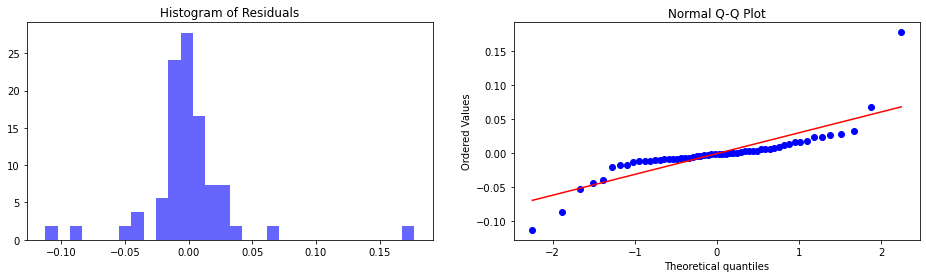

In [165]:
import matplotlib.pyplot as plt 
from scipy import stats 

# Get the residuals from SARIMAX results 
residuals = results.resid 

# Plot a histogram of the residuals 
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 2, 1) 
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b') 
plt.title("Histogram of Residuals") 

# Plot a QQ plot of the residuals 
plt.subplot(1, 2, 2) 
stats.probplot(residuals, dist="norm", plot=plt) 
plt.title("Normal Q-Q Plot") 
plt.show()


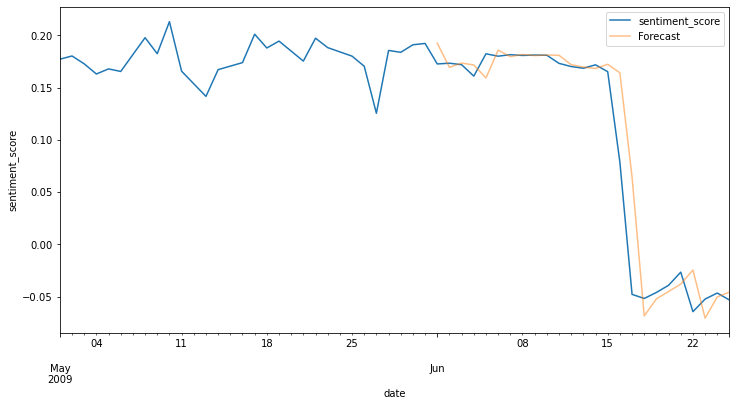

In [218]:
pred = results.get_prediction(start = pd.to_datetime('2009-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='Original')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.5, figsize=(12, 6))
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()

In [196]:
y_forecasted = pred.predicted_mean
y_truth = y['2009-06-01':]

In [197]:
y_truth

,sentiment_score
date,
2009-06-01,0.172664
2009-06-02,0.173374
2009-06-03,0.171944
2009-06-04,0.161025
2009-06-05,0.182378
2009-06-06,0.180086
2009-06-07,0.181526
2009-06-08,0.180806
2009-06-09,0.181166


In [198]:
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted

,predicted_mean
date,
2009-06-01,0.192479
2009-06-02,0.169446
2009-06-03,0.173523
2009-06-04,0.171708
2009-06-05,0.159237
2009-06-06,0.185897
2009-06-07,0.179674
2009-06-08,0.181766
2009-06-09,0.180686


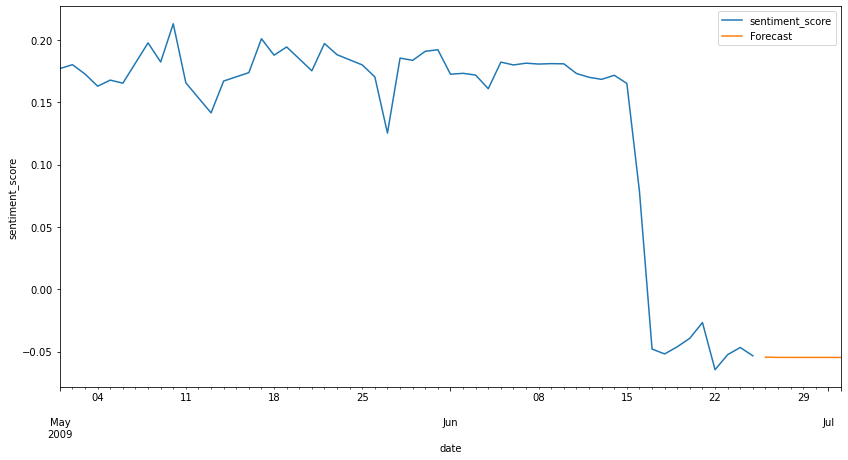

In [214]:
# Forecasting sentiment_score 7 days
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()

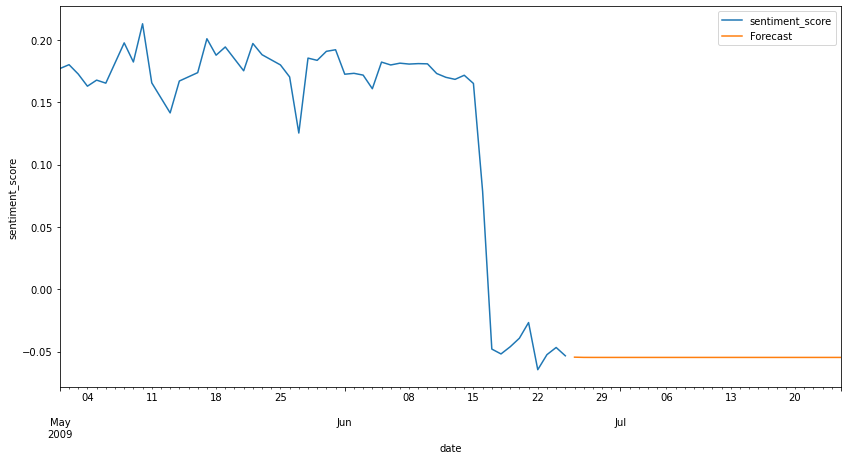

In [215]:
# Forecasting sentiment_score 30 days
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()


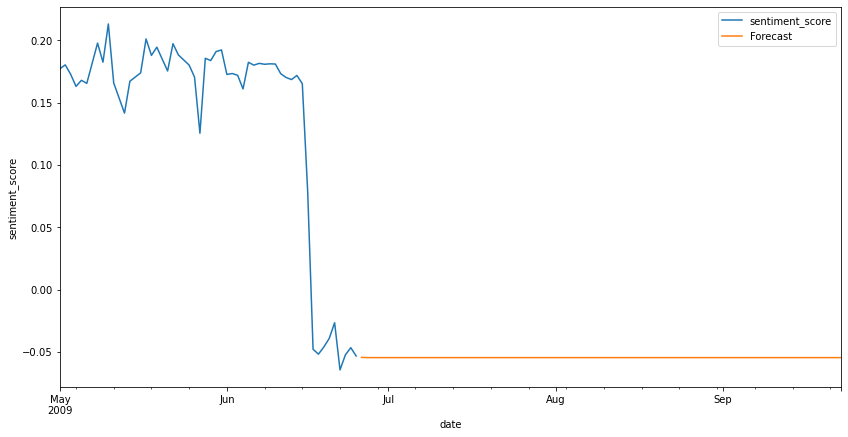

In [216]:
# Forecasting sentiment_score 90 days
pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()


# 5. Elavuation Phase


In [225]:
# Autoreg MSE

error_mse = mean_squared_error(y_true=data_test['sentiment_score'], y_pred=predictions)
print(f' Autoregressor MSE: {error_mse}')

 Autoregressor MSE: 0.00039152394612050595


In [226]:
# ARMA RMSE
arma_rmse = np.sqrt(mean_squared_error(test['sentiment_score'].values, y_pred_df['Predictions']))
print(f'ARMA RMSE: {arma_rmse}')

ARMA RMSE: 0.06556106819041148


In [227]:
# ARIMA error
arima_rmse = np.sqrt(mean_squared_error(test['sentiment_score'].values, y_pred_df['Predictions']))
print(f'ARIMA RMSE: {arima_rmse}')

ARIMA RMSE: 0.06556106819041148


In [224]:
# ARIMA approach 2
mse = ((y_forecasted['predicted_mean'] - y_truth['sentiment_score']) ** 2).mean()
print('MSE of ARIMA (2nd approach) is {}'.format(round(mse, 6)))

MSE of ARIMA (2nd approach) is 0.000946


In [223]:
# ARIMA approach 2
print('RMSE of ARIMA (2nd approach) is {}'.format(round(np.sqrt(mse), 5)))

RMSE of ARIMA (2nd approach) is 0.03075


# 6 Deployment Phase

In [ ]:
# Visualisation 

import plotly.express as px
import panel as pn

In [237]:
import panel as pn 
import param 
import hvplot.pandas 

#Assuming you have defined your 'results' object for forecasting 
# Sample data for demonstration 

data2 = { 'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'), 
        'Original': np.random.rand(365), 
        '7 Days Forecast': np.random.rand(365) + 0.2, 
        '30 Days Forecast': np.random.rand(365) + 0.5, 
        '90 Days Forecast': np.random.rand(365) + 0.8 } 

dataframe = pd.DataFrame(data2) 

pn.extension() 

class SentimentDashboard(param.Parameterized): 
    X_variable = param.Selector(objects=['Original', '7 Days Forecast', '30 Days Forecast', '90 Days Forecast']) 
    
    def forecast(self): 
        
        if self.X_variable == 'Original': 
            return dataframe.hvplot.line(x='Date', y=self.X_variable) 
        
        else: 
            return dataframe.hvplot.line(x='Date', y=self.X_variable) 
        
    def panel(self): 
        return pn.Row( 
            pn.Param(self, width=300, name="Sentiment Data Forecast", sizing_mode="fixed"),
            self.forecast
        )  
    
    
sentiment_dashboard = SentimentDashboard(name='Sentiment_Dashboard') 
component = sentiment_dashboard.panel() 
component.servable()

Row
    [0] Param(SentimentDashboard, name='Sentiment Data Forecast', sizing_mode='fixed', width=300)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [238]:
try: 
    component = sentiment_dashboard.panel() 
    component.servable() 

except Exception as e: 
    print(f"Error: {e}")

In [236]:
data2 = pd.DataFrame(data2)
data2

,Date,Original,7 Days Forecast,30 Days Forecast,90 Days Forecast
0,2023-01-01,0.105013,0.642235,1.053984,1.249730
1,2023-01-02,0.768542,0.921591,0.834458,1.536680
2,2023-01-03,0.203057,1.158351,1.288499,0.881285
3,2023-01-04,0.348838,0.246750,1.029171,1.467549
4,2023-01-05,0.438325,0.801420,1.142066,1.682096
5,2023-01-06,0.216857,0.582521,1.217674,1.150724
6,2023-01-07,0.824206,0.424057,0.581460,1.482969
7,2023-01-08,0.266016,0.933989,0.532242,1.361251
8,2023-01-09,0.650748,0.241533,1.248495,1.024266
9,2023-01-10,0.709169,0.339770,1.439358,1.539143
